# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [69]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/chinghan75/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


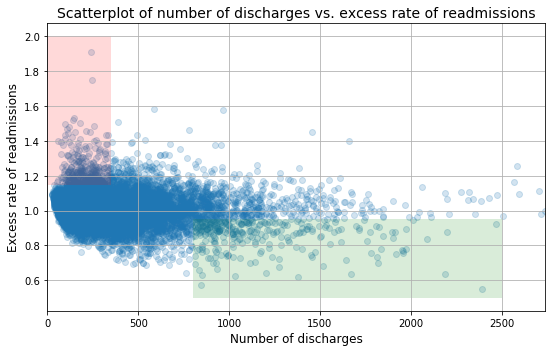

In [21]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Do you agree with the above analysis and recommendations? Why or why not?

I agree with the preliminary report mostly on the recommendations given on the assumption that smaller hospitals tend to have higher excess readmission ratio (ERR). The reasoning is quite intuitive. Compared to large hospitals, smaller hospitals have disadvantage in allocating resources to ensure quality of care and readmission prevention. 

However, the analysis from the report is quite superficial, which is based solely on the scatterplot that excluded the three large hospital outliers. The difference in means of ERR between the two hospital categories is untested with statistical significance and the significance of correlation is based on unfound evidence. Therefore, additional statistical analysis is required to bolster the conclusions.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

#### 1. Setup an appropriate hypothesis test.

The null hypotheses:

$$H_0: x_L = x_S$$

where $x_L$ is the mean of ERR of large hospitals and $x_S$ is of small hospitals. Small (number of discharges <= 300) and large hospitals (number of discharges > 300) are defined by the number of discharges over the three year period.

In [22]:
## Clean dataset:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [40]:
# Drop irrelevant columns:
df = hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']]

# Drop rows with 'Not Available' in number of discharges and convert the rest into integers:
df = df[df['Number of Discharges'] != 'Not Available']
df['Number of Discharges'] = pd.to_numeric(df['Number of Discharges'])

# Drop nans:
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 0 to 13730
Data columns (total 2 columns):
Number of Discharges        11497 non-null int64
Excess Readmission Ratio    11497 non-null float64
dtypes: float64(1), int64(1)
memory usage: 269.5 KB


In [72]:
# Create datasets for large ans small hospitals:
df_large = df[df['Number of Discharges'] > 300]
df_small = df[df['Number of Discharges'] <= 300]

#### 2. Compute and report the observed significance value (or p-value).

In [48]:
## Permutation test with two samples:

# Define test statistic:
def diff_of_means(data_1, data_2):

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute test statistic of observed data:
empirical_diff_means = diff_of_means(df_small['Excess Readmission Ratio'], df_large['Excess Readmission Ratio'])

# Concatenate data: data_concat
data_concat = np.concatenate((df_small['Excess Readmission Ratio'], df_large['Excess Readmission Ratio']))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(data_concat, size=len(data_concat))

    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(df_small)],
                                     bs_sample[len(df_small):])

# Compute and print p-value: p
p = np.sum(empirical_diff_means <= bs_replicates) / 10000

print('observed difference:', empirical_diff_means)
print('p-value:', p)

observed difference: 0.014479507404359326
p-value: 0.0


The p-value is 0. This indicates that none of the 10000 simulation trials have difference in mean ERR larger than the observed difference. We can easily reject the null hypothesis, and conclude that there is statistical significant difference between the distribution of ERR for large and small hospitals. 

#### 3. Report statistical significance for  α = .01.

Since p-value is at 0, which is well below the significance level. Therefore, the rejection of null hypothesis is still acceptable.

#### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

To answer this question, more evidence is needed for the statistical findings. We can find more evidence by generate descriptive statistic of the two hospital categories.

In [63]:
## Descriptive statistics:
print('Large hospitals:')
print(df_large['Number of Discharges'].describe())
print(df_large['Excess Readmission Ratio'].describe())
print('\nSmall hospitals:')
print(df_small['Number of Discharges'].describe())
print(df_small['Excess Readmission Ratio'].describe())

Large hospitals:
count    5365.000000
mean      588.855918
std       324.182905
min       301.000000
25%       380.000000
50%       493.000000
75%       680.000000
max      6793.000000
Name: Number of Discharges, dtype: float64
count    5365.000000
mean        0.999781
std         0.101234
min         0.549500
25%         0.938400
50%         0.998500
75%         1.060800
max         1.583600
Name: Excess Readmission Ratio, dtype: float64

Small hospitals:
count    6132.000000
mean      170.018428
std        70.194140
min        25.000000
25%       111.000000
50%       167.000000
75%       228.000000
max       300.000000
Name: Number of Discharges, dtype: float64
count    6132.000000
mean        1.014261
std         0.082426
min         0.760200
25%         0.961175
50%         1.006950
75%         1.056600
max         1.909500
Name: Excess Readmission Ratio, dtype: float64


As we can see, the number of large and small hospitals are relatively the same and their excess readmission ratios are fractionally different. The difference calculated above is only at 1.4% difference. However, the distribution in number of discharges vary drastically different. This means that although small hospitals have slightly higher ratio of excess readmission, they have less number of discharges and therefore total number of readmissions. 

Although our analysis proves that there is statistical difference in between the distribution of excess readmission ratio to the capacity of hospitals. There is little practical significance to make this argument, since larger hospital are responsible for larger number predicted readmission beyond their expected average. 

#### 5. Look at the scatterplot above.
  * What are the advantages and disadvantages of using this plot to convey information?
  * Construct another plot that conveys the same information in a more direct manner.
  
##### - The advantage: 
    1. The chart shows the entirety of the data instead of the descriptive statistic.
    
    2. The chart clearly displays the cluster of hospitals with relative low number of dispatches with high ratio of excess readmission.
    
##### - The disadvantage: 
    1. The chart has omitted three largest outliers that would distort the display of data.
    
    2. The colored boxes in the chart are misleading. In spite of the fact that the red box successively captured   the cluster of hospitals with high ERR, the green box failed to pin point the negative correlation of number of discharge and ERR. Visually, there are same amount of hospitals above and below the line of 1.0 ERR.
    
    3. Since there are more than 10000 data points, it is hard to tell the real distribution of the dataset because majority of the data are crowded between 0 and 1000 of numbers of dispatches along the line of 1.0 ERR.


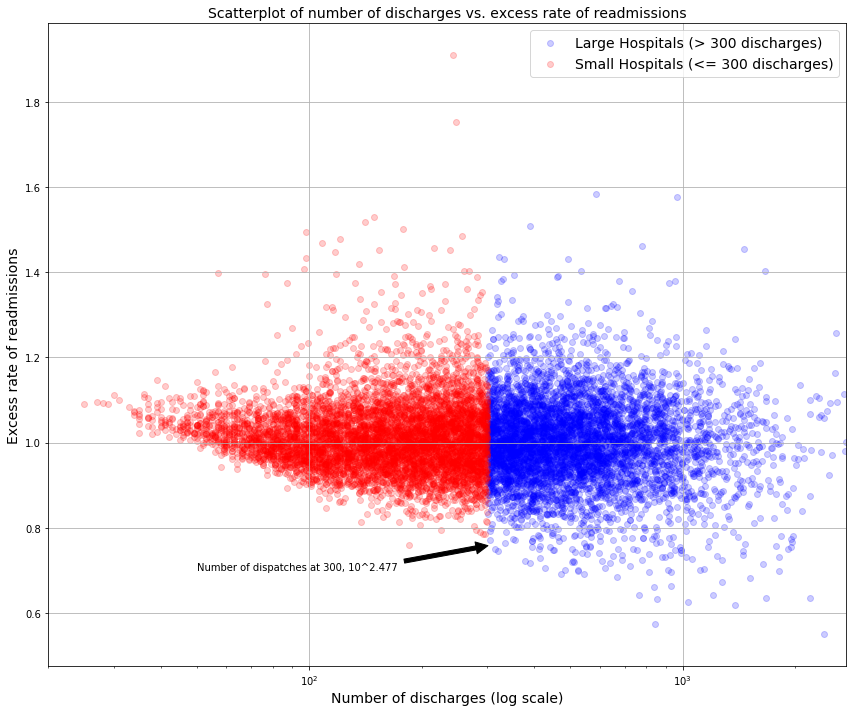

In [104]:
x_large = [a for a in df_large['Number of Discharges']]
y_large = list(df_large['Excess Readmission Ratio'])

x_small = [a for a in df_small['Number of Discharges']]
y_small = list(df_small['Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(12,10))
_ = ax.scatter(x_large, y_large, color='blue', alpha=0.2)
_ = ax.scatter(x_small, y_small, color='red', alpha=0.2)

_ = ax.set_xlim([20, max(x)])
_ = ax.set_xscale('log')
_ = ax.set_xlabel('Number of discharges (log scale)', fontsize=14)
_ = ax.set_ylabel('Excess rate of readmissions', fontsize=14)
_ = ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
_ = ax.legend(['Large Hospitals (> 300 discharges)', 'Small Hospitals (<= 300 discharges)'], fontsize=14)
_ = ax.annotate('Number of dispatches at 300, 10^2.477', xy=(310, 0.76), xytext=(50, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.05))           
    
ax.grid(True)
fig.tight_layout()

The distribution of the number of discharges is more visible after the right skewness is eliminated by changing scale to log. The different datasets are also displayed in different colors to show the difference of dispersion between datasets. We can now easily see that there are much more large hospitals that have ERR below 0.8 but both small and large hospitals have very similar dispersion above the 1.2 line in y-axis.